# Beaufort Gyre isopycnal data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import netCDF4 as nc
import scipy as sp
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

In [2]:
# some constants
nx        = 250  # number of cells
ny        = 300  # ""
nz        = 50   # ""
dx        = 2000  # cell size in meters
dy        = 2000  # ""
rhoConst  = 1029. # ref density
s0        = 33    # ref salinity
g         = 9.81
tAlpha    = 0
sBeta     = 7.4e-4
f0        = 1.4e-4
hDegLat   = 111000./2    # 0.5deg latitude in meters
hDegLon   = hDegLat * np.cos(2*np.pi*75/360) # 0.5deg lon in meters @ 75N
pdelta    = 4.4e-10   # pressure parameter for linear equation of state

### Change SW corner loc & domain size here
- corresponding lat & lon printed a few boxes below

In [3]:
# indices for profile location
# gives southwest corner of domain
# SW corner lat and lon printed below

# dont change dVI
dVI = -8              # deepValueIndex
myLat = 315           #  +1 index gives +0.5 deg
myLon = 20            #  +1 index gives -0.5 deg

# size of domain (index range!)
latRange = 35
lonRange = 120



### Change months to average here
- integers between 1 and 12, inclusive

In [4]:
# file i/o stuff
locLoad = '/home/hcm7920/data/'
monthList = [1,2,3,4,5,6,7,8,9,10,11,12]            # jan=1, dec=12
fname1 = "OCEAN_DENS_STRAT_PRESS_mon_mean_2017-"
fname2 = "_ECCO_V4r4_latlon_0p50deg.nc"

In [5]:
# load data for selected months & time average
lats  = nc.Dataset(locLoad+fname1+f"01"+fname2)["latitude"][myLat:myLat+latRange]
lons  = nc.Dataset(locLoad+fname1+f"01"+fname2)["longitude"][myLon:myLon+lonRange]
depth = nc.Dataset(locLoad+fname1+f"01"+fname2)["Z"][:dVI]
numLevels, = depth.shape
dataArray = np.ma.zeros(shape=(len(monthList),numLevels,latRange,lonRange))
for month in range(len(monthList)):
    dataArray[month,:,:,:] = nc.Dataset(locLoad+fname1+f"{month+1:02}"+fname2
                                     )["RHOAnoma"][0,:dVI,myLat:myLat+latRange,myLon:myLon+lonRange]
numLevels = dataArray.shape[1]
dataArray.fill_value=np.nan
densities = dataArray.mean(0)

print("SW corner lat is "+str((lats[0])))
print("SW corner lon is "+str((lons[0])))



SW corner lat is 67.75
SW corner lon is -169.75


In [6]:
print("SW corner lat is "+str((lats[0])))
print("SW corner lon is "+str((lons[0])))

SW corner lat is 67.75
SW corner lon is -169.75


In [7]:
# generate initial hydrostatic pressure field
pressure = np.zeros((nz+dVI,latRange,lonRange))
for i in range(50+dVI):
  pressure[i,:,:] = g * (rhoConst) * -depth[i]

# convert base density profile to potential density
densities = rhoConst + densities - rhoConst * pressure * pdelta


## Plot density sections for selected lats & lons
- Broken contours mark topography
- Purple: ~1023 kg/m3, Yellow: ~1028 kg/m3

In [8]:
# from lat lon to km
meridDistance  = np.linspace(hDegLat/2,hDegLat*latRange+hDegLat/2,latRange)
zonalDistance  = np.linspace(hDegLon/2,hDegLon*lonRange+hDegLon/2,lonRange)
meridDistance *= 1e-3 # convert to km
zonalDistance *= 1e-3 # convert to km

### Meridional sections
- Broken contours mark topography
- Purple: ~1023 kg/m3, Yellow: ~1028 kg/m3

Text(0, 0.5, 'Depth (m)')

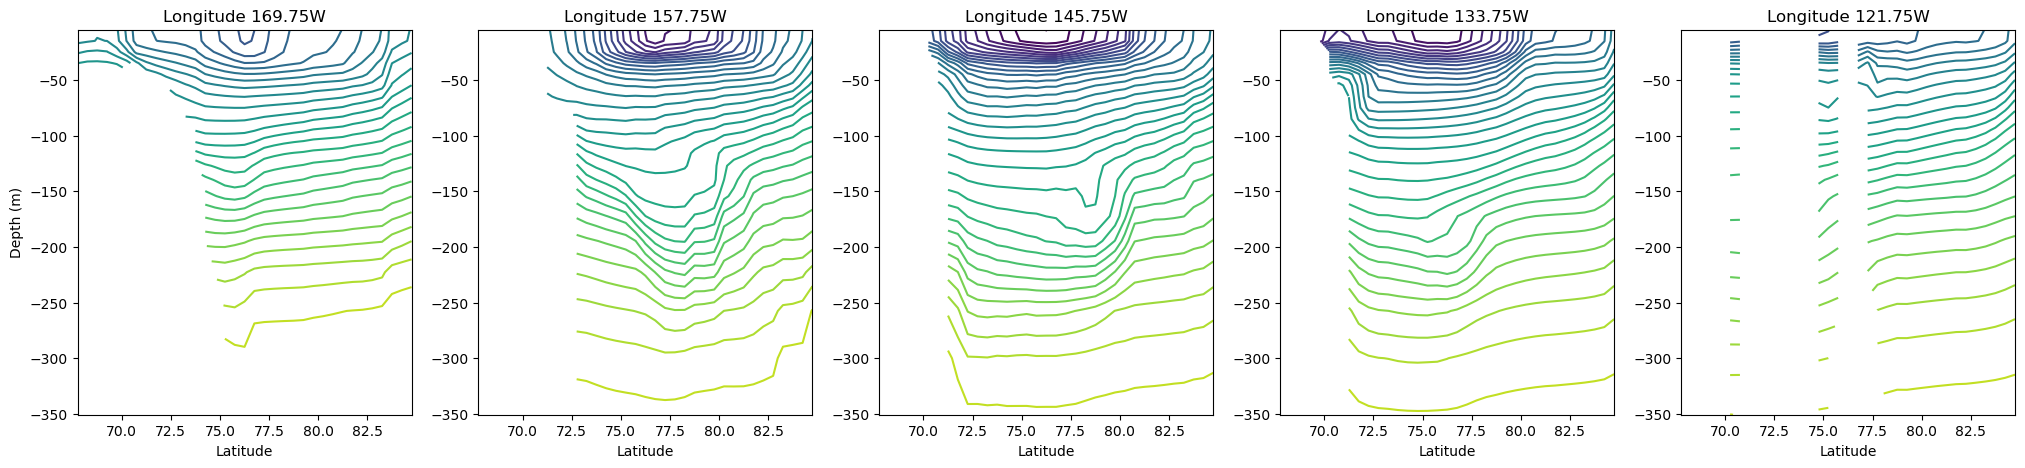

In [9]:
fig,axs  = plt.subplots(1,5,figsize=(25,5))
interval = int(lonRange/5)
counter  = 0
maxD     = 21
mx       = densities[1:,:,:].max()
mn       = densities[1:,:,:].min()
for ax in axs:
    ax.contour(lats,depth[:maxD],densities[:maxD,:,counter],35,vmax=mx,vmin=mn)
    ax.set_title(f"Longitude {-lons[counter]}W")
    ax.set_xlabel("Latitude")
    counter += interval
axs[0].set_ylabel("Depth (m)")

### Zonal sections
- At these length scales the sections are curved
- Broken contours mark topography
- Purple: ~1023 kg/m3, Yellow: ~1028 kg/m3

Text(0, 0.5, 'Depth (m)')

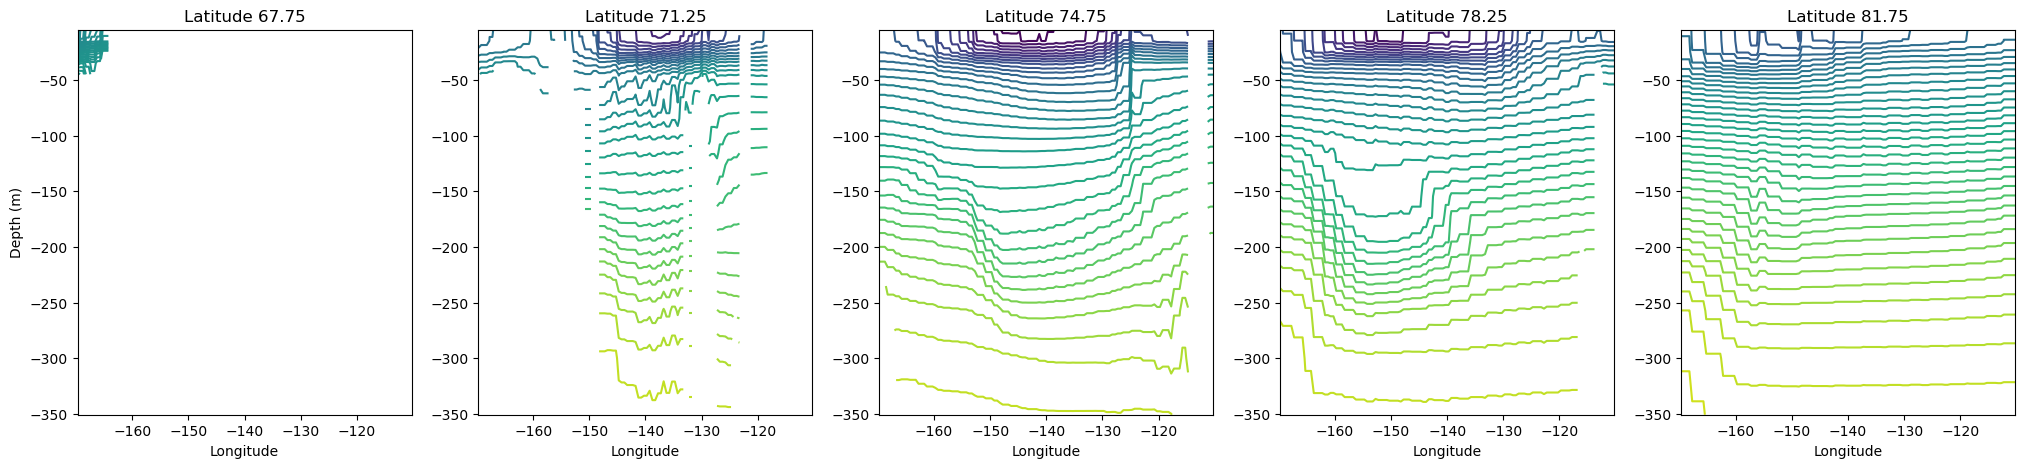

In [10]:
fig,axs  = plt.subplots(1,5,figsize=(25,5))
interval = int(latRange/5)
counter  = 0
maxD     = 21
for ax in axs:
    ax.contour(lons,depth[:maxD],densities[:maxD,counter,:],35,vmax=mx,vmin=mn)
    ax.set_title(f"Latitude {lats[counter]}")
    ax.set_xlabel("Longitude")
    counter += interval
axs[0].set_ylabel("Depth (m)")

## Plot BG bowl
- At these length scales the domain is not really a square
- Broken contours mark topography
- Purple: ~1023 kg/m3, Yellow: ~1028 kg/m3

1028.3966162325771
1022.9764314823046


TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'pad'

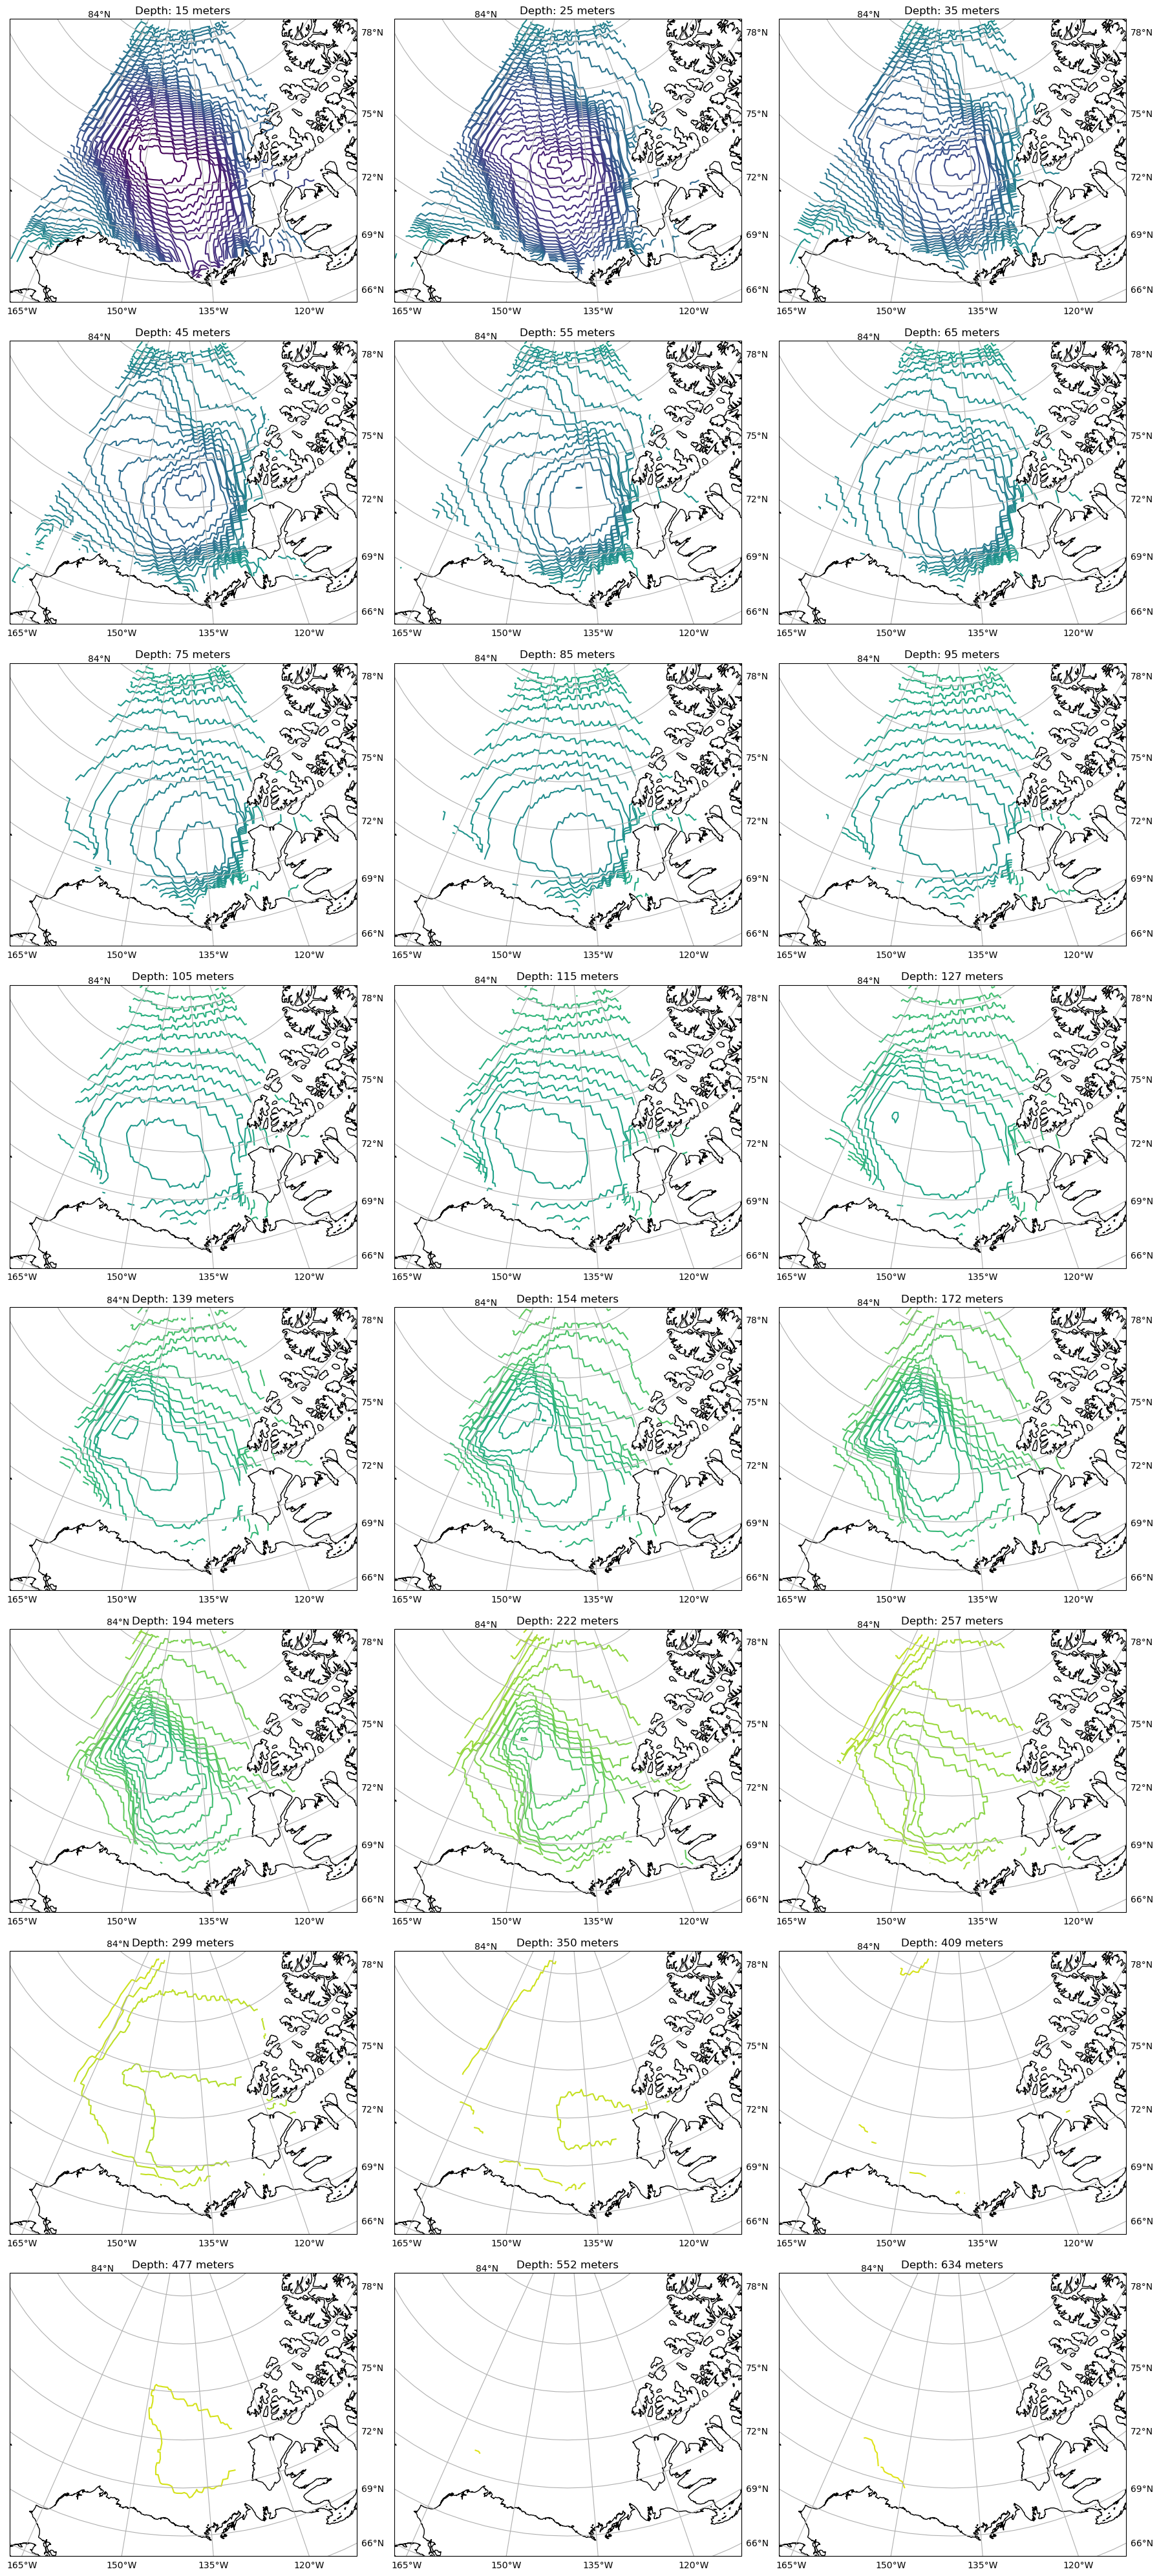

In [15]:
fig      = plt.figure(figsize=(18,40))
interval = 1
counter  = 1
mx       = densities[1:,:,:].max()
mn       = densities[1:,:,:].min()
print(mx)
print(mn)
ctrLevs  = np.linspace(mn,mx,80)
for index in range(24):    
    axs = plt.subplot(8,3,(1+index),
                      projection=ccrs.AzimuthalEquidistant(
                      central_longitude=-140,central_latitude=75))
    axs.contour(lons,lats,densities[counter,:,:],ctrLevs,
                transform=ccrs.PlateCarree())
    axs.set_title(f"Depth: {-int(depth[counter])} meters")
    axs.set_ylabel("Latitude")
    axs.set_xlabel("Longitude")
    axs.coastlines(resolution="10m")
    gl = axs.gridlines(draw_labels=True,rotate_labels=False)
    gl.xlocator = mticker.FixedLocator([-165,-150,-135,-120])
    gl.top_labels = False
    gl.left_labels= False
    axs.xaxis.set_major_formatter(LongitudeFormatter(dateline_direction_label=False))
    axs.yaxis.set_major_formatter(LatitudeFormatter())
    counter += interval
plt.tight_layout()
plt.savefig("/home/hcm7920/experiments/arcticMiddepthBI/plots/eccoBGIsopycnals.png",
            bbox_inches="tight",pad=0)
    
        